In [1]:
import pandas as pd
df=pd.read_csv('/content/titanic.csv')
df.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
df = df.drop(['Name','Fare'],axis=1)


In [3]:
df.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [4]:
# df=df.apply(lambda col: pd.factorize(col, sort=False)[0])
print(df.head())

   Survived  Pclass  ... Siblings/Spouses Aboard  Parents/Children Aboard
0         0       3  ...                       1                        0
1         1       1  ...                       1                        0
2         1       3  ...                       0                        0
3         1       1  ...                       1                        0
4         0       3  ...                       0                        0

[5 rows x 6 columns]


In [5]:
dum=pd.get_dummies(df['Sex'])
dum

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [6]:
dum=dum.drop(columns=['male'],axis=1)
print(dum)

     female
0         0
1         1
2         1
3         1
4         0
..      ...
882       0
883       1
884       1
885       0
886       0

[887 rows x 1 columns]


In [7]:
df=df.drop(columns=['Sex'])

In [8]:
dum2=pd.get_dummies(df['Pclass'])
dum2=dum2.drop(columns=[3],axis=1)
print(dum2)

     1  2
0    0  0
1    1  0
2    0  0
3    1  0
4    0  0
..  .. ..
882  0  1
883  1  0
884  0  0
885  1  0
886  0  0

[887 rows x 2 columns]


In [9]:
df= df.drop(columns=['Pclass'])
df.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,22.0,1,0
1,1,38.0,1,0
2,1,26.0,0,0
3,1,35.0,1,0
4,0,35.0,0,0


In [10]:
td=pd.concat([df,dum,dum2],axis=1)

In [11]:
td.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,female,1,2
0,0,22.0,1,0,0,0,0
1,1,38.0,1,0,1,1,0
2,1,26.0,0,0,1,0,0
3,1,35.0,1,0,1,1,0
4,0,35.0,0,0,0,0,0


In [12]:
import numpy as np
X=np.array(td.drop(columns='Survived'))

In [13]:
Y=np.array([td['Survived']])

In [14]:
print(X[0:5])
print(Y[0:5])

[[22.  1.  0.  0.  0.  0.]
 [38.  1.  0.  1.  1.  0.]
 [26.  0.  0.  1.  0.  0.]
 [35.  1.  0.  1.  1.  0.]
 [35.  0.  0.  0.  0.  0.]]
[[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0
  1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0
  0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
  0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1
  0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
  0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1
  1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1
  0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0
  0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0
  0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 

In [15]:
X=X.T


In [16]:
print(X)
print(X.shape)

[[22. 38. 26. ...  7. 26. 32.]
 [ 1.  1.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  2.  0.  0.]
 [ 0.  1.  1. ...  1.  0.  0.]
 [ 0.  1.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
(6, 887)


In [17]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
 
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [97]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [19]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):

    Z = np.dot(W,A)+b
    cache = (A, W, b)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    
    
    return Z, cache

In [20]:
def sigmoid(Z):
  return (1/(1+np.exp(-Z))),Z

In [21]:
def relu(Z):
  return np.maximum(0,Z),Z

In [22]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [23]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],"relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [24]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
   
    
    m = Y.shape[1]

    cost = -1/m*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [25]:
def dzsig(AL,Y):
  dzsigm= 1/m*(AL-Y)
  return dzsigm

In [26]:
def dzrel(dzsigm,W2,A1):
  
  A1[A1>0]=1
  A1[A1<=0]=0
    
      
  dzrelu=1/m*np.dot(dzsigm,W2.T)*A1
  return dzrelu

In [27]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = 1/m*np.dot(dZ,A_prev.T)
    db = 1/m*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [28]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [29]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL =-( Y/AL-(1-Y)/(1-AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [30]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [31]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" +str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" +str(l+1)]
    ### END CODE HERE ###
    return parameters

In [95]:
import numpy as np
parameters=initialize_parameters_deep([6,20,20,10,5,1])
print(parameters)

{'W1': array([[ 5.36588542,  1.30952955,  0.2894924 , -5.59047811, -0.83216461,
        -1.06427694],
       [-0.24822444, -1.88100203, -0.13145451, -1.43165409, -3.94159426,
         2.65386714],
       [ 2.64395413,  5.12871919,  0.15010093, -1.21403224, -1.63607984,
        -4.63943195],
       [ 2.9471023 , -3.30320289, -3.55513958, -0.6169497 ,  4.45844507,
         0.7101488 ],
       [-3.07135542, -2.1389796 ,  1.8757349 , -0.48154009, -2.30650905,
        -0.69009217],
       [ 2.2351688 ,  5.92833235, -3.73236999, -1.87925073, -2.41129828,
        -7.25724952],
       [-2.77137607, -3.07162728,  3.37193388, -0.3957427 , -4.86985634,
         1.94002636],
       [-1.06881228, -5.22942311, -1.78994893, -1.76578314, -2.62164689,
         0.08914145],
       [-6.7447733 , -0.80328559,  3.03955033,  2.55839352,  3.3245625 ,
         3.35817197],
       [ 4.4626294 , -3.35490205,  2.53750022, -5.58266859, -1.80865531,
        -5.74341613],
       [ 3.14444254,  4.00121346, -0.592244

In [96]:
AL,caches=L_model_forward(X,parameters)
print(AL[0][0:10])
print(Y[0][0:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 1 1 1 0 0 0 0 1 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [88]:
cost=compute_cost(AL,Y)
print(cost)


35.54663584366773


In [66]:
grads=L_model_backward(AL,Y,caches)


In [67]:
print(grads)


{'dA4': array([[-6.31940892e-04,  5.19682303e-01,  5.19575895e-01, ...,
        -5.52682625e-02,  5.19620057e-01, -1.62403731e-05],
       [ 4.96714435e-04, -4.08477604e-01, -4.08393965e-01, ...,
         4.34416321e-02, -4.08428678e-01,  1.27651618e-05],
       [ 5.41160485e-04, -4.45028214e-01, -4.44937092e-01, ...,
         4.73287930e-02, -4.44974911e-01,  1.39073896e-05],
       [ 1.96293852e-04, -1.61424023e-01, -1.61390970e-01, ...,
         1.71674602e-02, -1.61404688e-01,  5.04459427e-06],
       [ 4.16895048e-04, -3.42837410e-01, -3.42767212e-01, ...,
         3.64607912e-02, -3.42796346e-01,  1.07138677e-05]]), 'dW5': array([[-8.93106488e+00, -2.75648358e-04,  0.00000000e+00,
        -6.38006902e+00, -1.01276167e-01]]), 'db5': array([[-0.3676734]]), 'dA3': array([[-2.87560930e-04,  1.12211209e-02,  2.36429909e-01, ...,
        -1.19336727e-03,  2.36450005e-01, -7.39008483e-06],
       [-3.83375780e-04,  1.84080508e-01,  3.15207983e-01, ...,
        -1.95769796e-02,  3.152347

In [68]:
parameters=update_parameters(parameters,grads,learning_rate=0.01)



In [69]:
AL,caches=L_model_forward(X,parameters)
print(AL)

[[0.34261255 0.22316602 0.30833216 0.23990703 0.2510992  0.30116251
  0.1288902  0.37184844 0.29603094 0.40476793 0.42371678 0.11529901
  0.34929224 0.25774861 0.39331817 0.14440212 0.3453072  0.31467517
  0.29304006 0.33557408 0.23996076 0.24569928 0.38589574 0.24987143
  0.29998504 0.27513307 0.30780645 0.27464505 0.32180165 0.32821421
  0.18635954 0.17349625 0.36395638 0.10712377 0.27151582 0.19369482
  0.36368534 0.34219552 0.36244881 0.40822963 0.23811738 0.32134977
  0.47374879 0.3567622  0.28173138 0.35688137 0.30171592 0.36866226
  0.38395244 0.28570772 0.34219552 0.16904337 0.30782161 0.09232158
  0.15961277 0.32783475 0.29135157 0.43393589 0.23178523 0.33516871
  0.19568524 0.17941737 0.32622656 0.09771054 0.431973   0.27534125
  0.35645638 0.26819948 0.32214262 0.25745109 0.21129375 0.32829023
  0.31493047 0.26920946 0.314531   0.32821421 0.29460094 0.54253504
  0.28236192 0.33516871 0.28812339 0.27608052 0.24987143 0.35591311
  0.27830882 0.3815145  0.34929224 0.26810236 0.

35.54663584366773


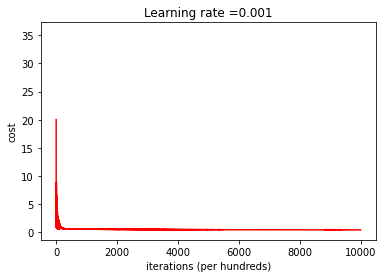

In [89]:
costs=[]
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10000):
  grads=L_model_backward(AL,Y,caches)
  parameters=update_parameters(parameters,grads,learning_rate=0.001)

  AL,caches=L_model_forward(X,parameters)
  costs.append(compute_cost(AL,Y))
  plt.plot(np.squeeze(cost))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(0.001))
plt.plot(list(range(10000)), costs, '-r')
print(cost)

In [90]:
print(costs[9999])

0.4366850534016388


In [92]:
print(costs[9999
            ])
print(cost)

0.4366850534016388
35.54663584366773


In [ ]:
costs=[]
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10000):
  grads=L_model_backward(AL,Y,caches)
  parameters=update_parameters(parameters,grads,learning_rate=0.01)
  AL,caches=L_model_forward(X,parameters)
  costs.append(compute_cost(AL,Y))
  plt.plot(np.squeeze(cost))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(0.001))
plt.plot(list(range(10000)), costs, '-r')
print(cost)

In [93]:
print(AL[0][0:10])
print(Y[0][0:10])

[0.17323783 0.95942796 0.78913873 0.96470549 0.14648618 0.18393514
 0.36394315 0.11702833 0.61810235 0.9534881 ]
[0 1 1 1 0 0 0 0 1 1]
